Одни из базовых библиотек с которыми придётся часто работать - это numpy, matplotlib

In [6]:
!pip3 install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 6.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 3.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 4.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.9 MB/s eta 0:00:00a 0:00:01


In [7]:
import numpy as np
from skimage.io import imread, imsave
from matplotlib import pyplot as plt

from platform import python_version

%matplotlib inline

np.__version__, python_version()

('1.23.3', '3.10.6')

Чтение картинки в память осуществляет функция imread

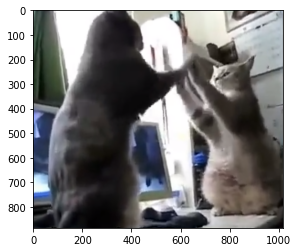

In [8]:
ladushki_image = imread('ladushki.png')

plt.imshow(ladushki_image)

In [9]:
# это уже массив numpy
ladushki_image.shape

(885, 1017, 4)

А что за тип у картинки?

In [4]:
# элементы, хранящиеся в матрице, имеют тип uint8 - беззнаковых 8-битных чисел (0,255)
ladushki_image.dtype, type(ladushki_image), isinstance(ladushki_image, np.ndarray)

(dtype('uint8'), numpy.ndarray, True)

Придётся учить numpy :c

# 2. Numpy

## 2.1 Что такое и как пользоваться

In [5]:
custom_list = [1, 3, 3, 7]
custom_list2 = [1, 4, 8, 8]
numpy_array = np.array([1, 4, 8, 8])

custom_list, numpy_array

([1, 3, 3, 7], array([1, 4, 8, 8]))

Доступны арифметические опреации над numpy-массивами

In [6]:
np.mean(custom_list), np.mean(numpy_array), numpy_array.mean(), custom_list - numpy_array

(3.5, 5.25, 5.25, array([ 0, -1, -5, -1]))

Однако у питоновских листов не определены такие операции

In [7]:
custom_list - custom_list2

TypeError: unsupported operand type(s) for -: 'list' and 'list'

Хотим посемплировать числа/массивы из распределений

In [8]:
np.arange(10), np.random.uniform(-10, 10, size=3), np.random.normal(loc=5, scale=2, size=(1, 1, 1)), \
                                                    np.arange(10).reshape(5, 2)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([-3.5005673 ,  1.91853312,  5.61069429]),
 array([[[5.79453809]]]),
 array([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]))

#### Numpy не палочка-выручалочка, использовать их не всегда имеет смысл

In [9]:
%%timeit 
[i for i in range(1000)]

38.4 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%%timeit
np.arange(1000)

1.49 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
%%timeit 
for i in range(1000):
    pass

23.1 µs ± 313 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%%timeit
for i in np.arange(1000):
    pass

55.7 µs ± 4.97 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Что точно пригодится

Начнём со слайсов. Слайсы бывают с 1, 2 и 3 параметрами, разделенными через ":". Первый параметр это начало, второй - конец(невключительно), а 3 - шаг.

In [13]:
gen = range(10) # ints only
arr = list(range(10))
narr = np.arange(10, dtype='float32') # any other type that you may know


gen[::2], arr[1:9], narr[0:-1:4] # gen/list/array slices

(range(0, 10, 2), [1, 2, 3, 4, 5, 6, 7, 8], array([0., 4., 8.], dtype=float32))

Т.к. в питоне принято использовать списки, то мы можем любой кусок списка заменить любым другим списком произвольной длины.

In [14]:
from copy import copy

copy_arr = copy(arr)
arr[2:4] = [3, 2, 2]
copy_arr, arr, copy_arr[2:4], arr[2:3]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 3, 2, 2, 4, 5, 6, 7, 8, 9],
 [2, 3],
 [3])

Однако numpy так не работает. Он хранит в неком порядке последовательность чисел непрерывно.

In [15]:
copy_narr = np.copy(narr)
narr[2:4] = [3, 2, 2]
copy_narr, narr

ValueError: could not broadcast input array from shape (3,) into shape (2,)

In [16]:
np.arange(10) + np.arange(10)[::-1]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [17]:
np.mean(np.arange(1, 7)) # expected value of dice

3.5

In [18]:
np.mean((np.arange(1, 7) - 3.5) ** 2), np.var(np.arange(1, 7)) # dispersion of dice

(2.9166666666666665, 2.9166666666666665)

In [19]:
np.arange(10) / np.arange(1, 11) # implicit conversion to float

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ,
       0.83333333, 0.85714286, 0.875     , 0.88888889, 0.9       ])

### 2.1.1 Теперь посложнее

Нам доступны матричные операции и некоторые алгоритмы линейной алгебры

In [20]:
np.random.seed(206)

A = np.random.normal(size=(3, 3))
b = np.random.normal(size=(3, 1))
x = np.linalg.solve(A, b)

np.linalg.det(A), np.dot(A, x), A @ x, b

(1.0809981704446563,
 array([[-0.32176781],
        [-0.05782928],
        [ 0.73000229]]),
 array([[-0.32176781],
        [-0.05782928],
        [ 0.73000229]]),
 array([[-0.32176781],
        [-0.05782928],
        [ 0.73000229]]))

##### Трюк в numpy индексации

In [21]:
B = np.random.normal(loc=0, scale=1, size=(4, 4, 4, 4))
B.shape

(4, 4, 4, 4)

In [22]:
%%timeit
B[1][1][1][1]

648 ns ± 42.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Вызов сверху можно расшифровать так ( ( ( B \[ 1 \] ) \[ 1 \] ) \[ 1 \] ) \[ 1 \]. Однако numpy может индексироваться быстрее

In [23]:
%%timeit
B[1, 1, 1, 1]

165 ns ± 11.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


#### Advanced indexing

In [24]:
A = np.eye(3)
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Выбрали только 0-ую и 2-ую строчки

In [25]:
A[[0, 2]]

array([[1., 0., 0.],
       [0., 0., 1.]])

Тоже самое, но со столбцами

In [26]:
A[:, [2, 1]]

array([[0., 0.],
       [0., 1.],
       [1., 0.]])

Меняем порядок

In [27]:
A[[2, 1, 0]], A[[1, 2, 0]] # reverse lines, cycle shift lines

(array([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]]))

In [28]:
A[:, [2, 1, 0]]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Добавляем новые размерности

In [29]:
B.shape, B[:, None].shape, B[:, np.newaxis].shape

((4, 4, 4, 4), (4, 1, 4, 4, 4), (4, 1, 4, 4, 4))

In [30]:
A = np.arange(25).reshape(5, -1).reshape(-1, 5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

Поэлементное сравнение

In [31]:
A > 5

array([[False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [32]:
A[A > 5]

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24])

Если хотим что-то перемешать. Можно воспользоваться np.random.permute или np.random.permutation на массиве, а можно задать длину перестановки

In [33]:
aesc = np.random.permutation(5)
np.arange(17)[aesc], aesc

(array([0, 3, 4, 1, 2]), array([0, 3, 4, 1, 2]))

Доступна сортировка

In [34]:
ug = np.sort(aesc, kind='mergesort')
idx = np.argsort(aesc, kind='quicksort')

ug, idx

(array([0, 1, 2, 3, 4]), array([0, 3, 4, 1, 2]))

Объединяем массивы

In [35]:
np.hstack([aesc, ug]) # because aesc and ug are lines, not columns

array([0, 3, 4, 1, 2, 0, 1, 2, 3, 4])

In [36]:
np.hstack([aesc[:, None], ug[:, None]])

array([[0, 0],
       [3, 1],
       [4, 2],
       [1, 3],
       [2, 4]])

In [37]:
np.vstack([aesc, ug])

array([[0, 3, 4, 1, 2],
       [0, 1, 2, 3, 4]])

In [38]:
np.stack([aesc, ug], axis=-1)

array([[0, 0],
       [3, 1],
       [4, 2],
       [1, 3],
       [2, 4]])

![](pacan.jpg)

## 2.2 Numpy with images

Не забываем для чего нам numpy

### 2.2.1 Fast images downscale

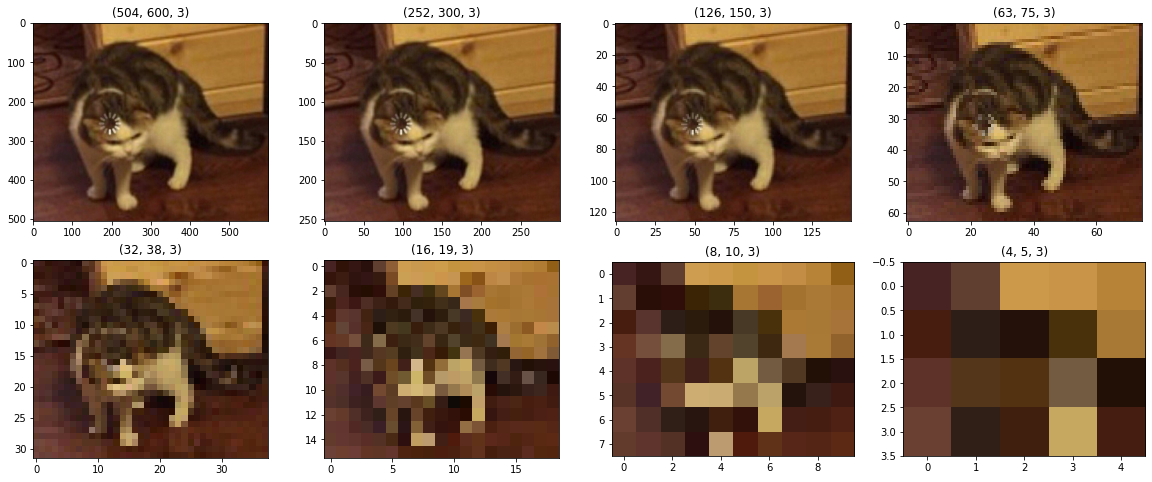

In [39]:
load_image = imread('tak-stop.jpg')

plt.figure(figsize=(20, 8))

deg2 = 1

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(load_image[::deg2, ::deg2]) # slices
    ## мы только что выбрали каждый deg2-ый пиксель посчету по высоте и ширине
    plt.title(load_image[::deg2, ::deg2].shape)
    deg2 *= 2

### 2.2.1.x Image collage

Давайте сделаем коллаж из простых картинок. Вспомним, что в numpy массивы в произвольный кусок можно вставить лишь тот, что имеет ту же форму.

In [40]:
from sklearn import datasets

digits = datasets.load_digits()

digits.images.shape # its not mnist

(1797, 8, 8)

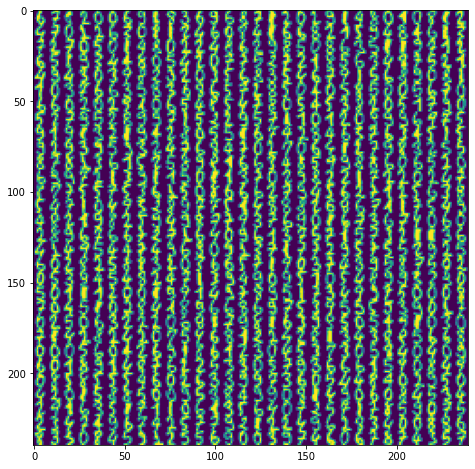

In [41]:
h_count = 30
w_count = 30


# создаем буфер для коллажа
collage = np.zeros((h_count * 8, w_count * 8), dtype='uint8')

for i in range(h_count):
    
    shift_i = i * 8
    
    for j in range(w_count):
        
        shift_j = j * 8
        
        idx = np.random.randint(digits.images.shape[0])
        
        image = digits.images[idx]
        
        # вставляем в slice (8, 8) картинку того же размера
        collage[shift_i:shift_i + 8, shift_j:shift_j + 8] = image
        
plt.figure(figsize=(8, 8))

plt.imshow(collage)

##### Сохраним на память

In [42]:
imsave('collage.png', collage)

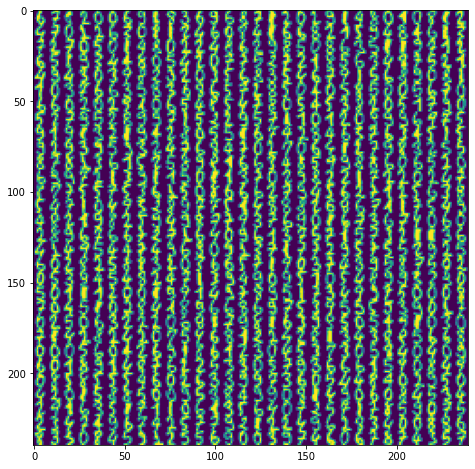

In [43]:
collage = imread('collage.png')

plt.figure(figsize=(8, 8))

plt.imshow(collage)

### 2.2.2 How to work with images as arrays of numbers

#### Из цветных в черно-белые

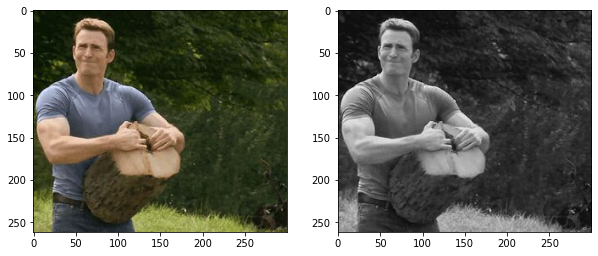

In [44]:
from skimage.color import rgb2gray 

cap_image = imread('cap.jpg')


images = [cap_image, rgb2gray(cap_image)]

plt.figure(figsize=(10, 5))

for idx, img in enumerate(images):
    plt.subplot(1, 2, idx + 1)
    plt.imshow(img, cmap='gray')

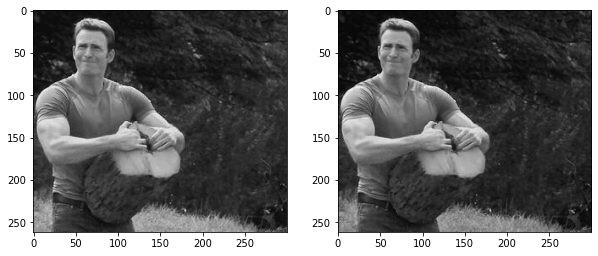

In [45]:
fst = 0.299 * cap_image[:, :, 0] + 0.587 * cap_image[:, :, 1] + 0.114 * cap_image[:, :, 2] # ycbcr
snd = (1. * cap_image[:, :, 0] + 1. * cap_image[:, :, 1] + 1. * cap_image[:, :, 2]) / 3.

gray_images = [fst, snd]

plt.figure(figsize=(10, 5))

for idx, img in enumerate(gray_images):
    plt.subplot(1, 2, idx + 1)
    plt.imshow(img, cmap='gray')

In [46]:
np.all(gray_images[0] == images[1]), np.any(gray_images[0] == images[1])

(False, False)

In [47]:
np.mean((gray_images[0] - gray_images[1]) ** 2), np.mean((gray_images[0] - images[1]) ** 2)

(47.70822952650972, 7233.454358461323)

Почему второе значение такое большое? Разные библиотеки возвращают как результаты функций объекты либо в [0; 1], либо в [0; 255]. Matplotlib может работать как с 1, так со 2 случаями. 

In [48]:
np.max(gray_images[0]), np.max(images[1])

(250.54799999999997, 0.9840835294117647)

#### Негатив картинок

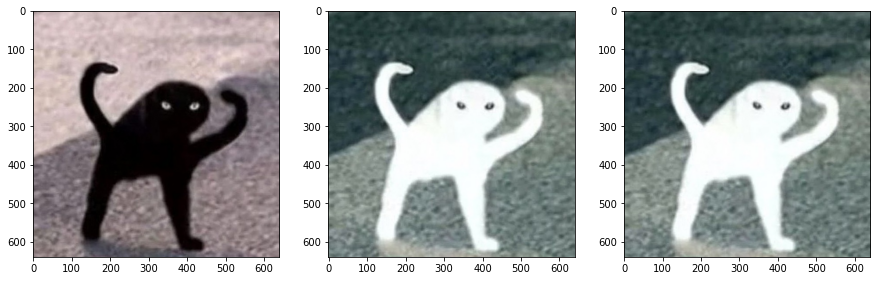

In [49]:
uuu_image = imread('uuu.jpg')[:, :, :3]

plt.figure(figsize=(15, 5))


# (255 - uuu_image) работает, потому что пикселы из uuu_image хранятся в uint8
# поэтому это эквивалетно побитовому отрицанию

uuu_list = [uuu_image, 255 - uuu_image, np.bitwise_not(uuu_image)]

for idx, img in enumerate(uuu_list):
    plt.subplot(1, 3, idx + 1)
    plt.imshow(img)

In [50]:
np.max(np.abs(uuu_list[1] - uuu_list[2])), np.equal(uuu_list[1], uuu_list[2]), uuu_list[1] == uuu_list[2]

(0,
 array([[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],
 
        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],
 
        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],
 
        ...,
 
        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],
 
        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
   

In [51]:
(uuu_list[1] == uuu_list[2]).shape, uuu_image.shape

((640, 640, 3), (640, 640, 3))

In [52]:
np.all(uuu_list[1] == uuu_list[2]), np.any(uuu_list[0] == uuu_list[2])

(True, False)

#### RGB shift

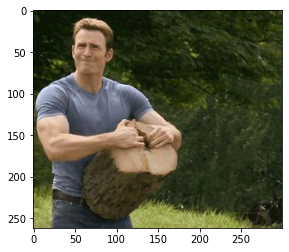

In [53]:
cap_image = imread('cap.jpg')[:, :, :3]

plt.imshow(cap_image)

Будем сдвигать все пикселы на какую-то константу

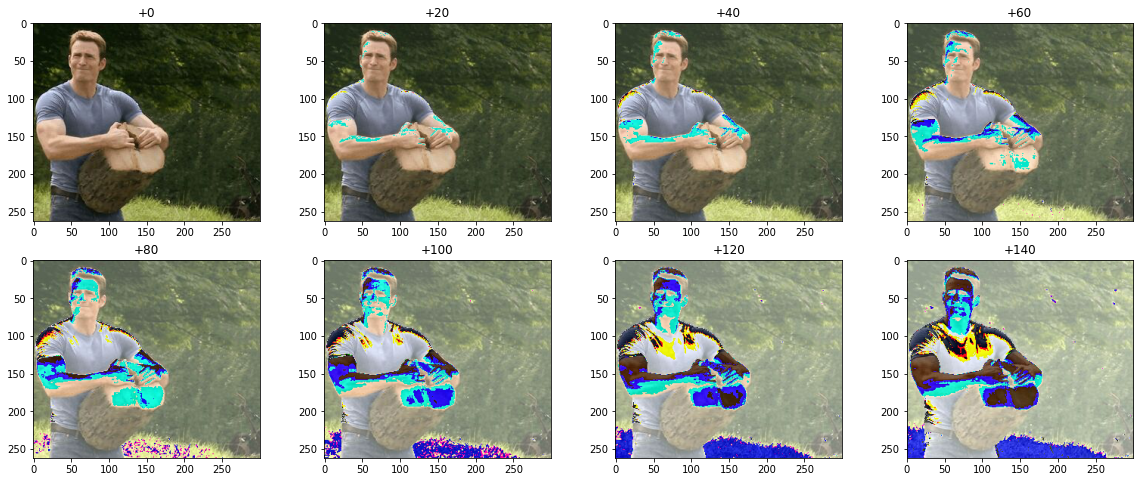

In [54]:
plt.figure(figsize=(20, 8))

shift = 0

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(np.clip(cap_image + shift, 0, 255))
    plt.title('+' + str(shift))
    shift += 20

> Данная ошибка возникла, потому что наш массив хранит числа uint8, и при арифметических операциях с числами возникает переполнение типа.

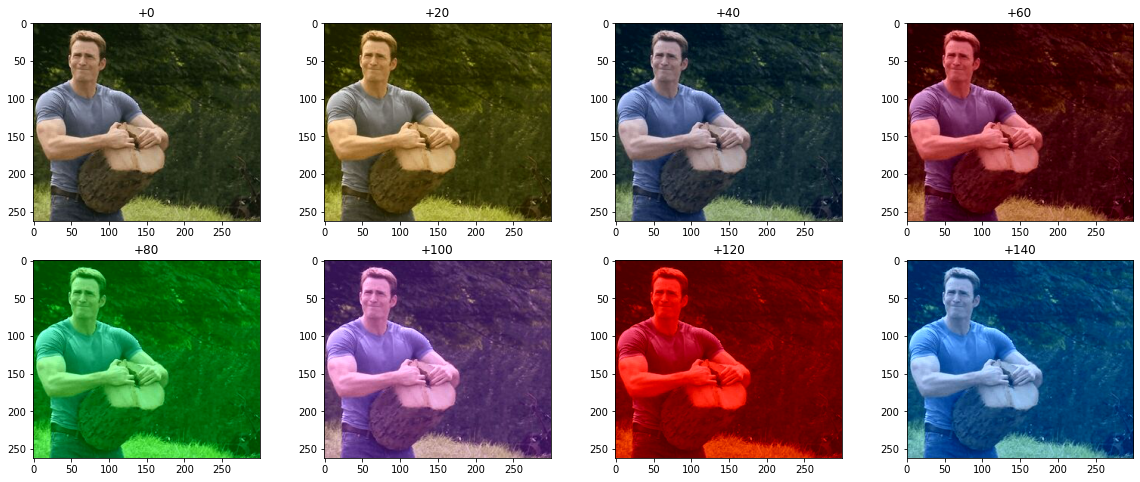

In [55]:
plt.figure(figsize=(20, 8))

shift = 0

def custom_rgb_shift(img, shift):
    pix_shift = np.random.randint(-shift, shift + 1, size=3)[None, None, :]
    # повышаем тип, понижаем обратно
    return (cap_image.astype('int32') + pix_shift).clip(0, 255).astype('uint8')

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(custom_rgb_shift(img=cap_image, shift=shift))
    plt.title('+' + str(shift))
    shift += 20

Такая операция уже реализована в одной из библиотек

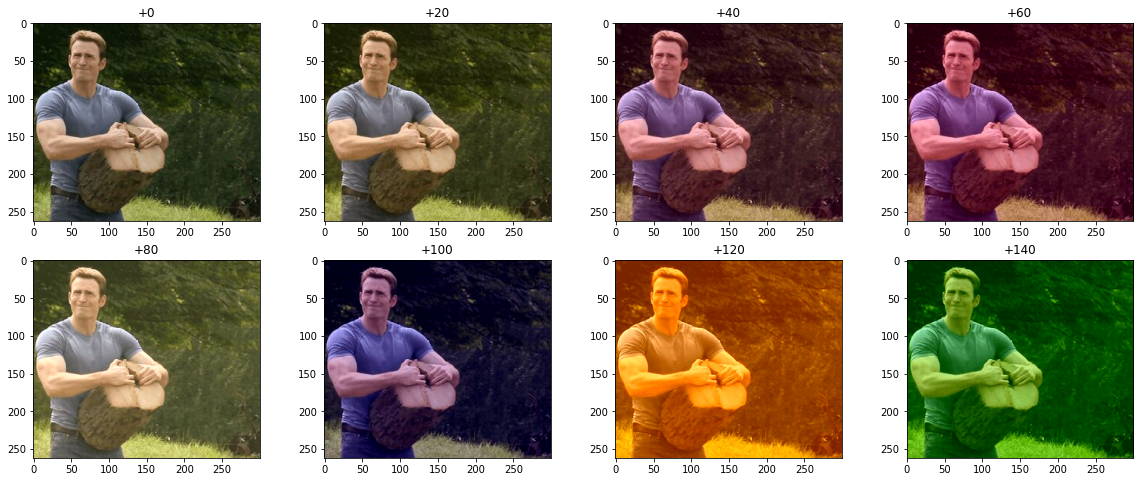

In [56]:
from albumentations import RGBShift

plt.figure(figsize=(20, 8))

shift = 0

for i in range(8):
    plt.subplot(2, 4, i + 1)
    transform = RGBShift(r_shift_limit=shift, g_shift_limit=shift, b_shift_limit=shift)
    plt.imshow(transform(image=cap_image)['image'])
    plt.title('+' + str(shift))
    shift += 20

### 2.2.3 Arbitrary image resize

In [57]:
lena_image = imread('legenda.png')[:, :, :3]
lena_image.shape

(2048, 2048, 3)

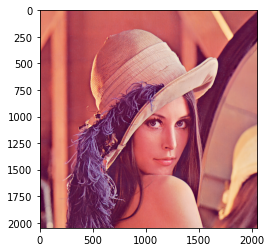

In [58]:
plt.imshow(lena_image)

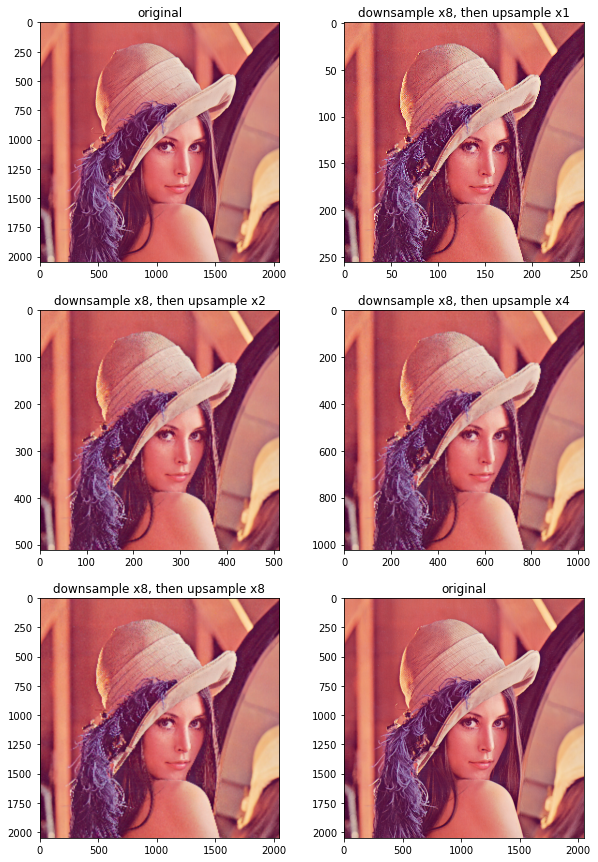

In [59]:
from skimage.transform import resize

plt.figure(figsize=(10, 15))

deg2 = 1
h, w = lena_image[::8, ::8].shape[:2]

def get_current_image(iter_num):
    if iter_num in [0, 5]:
        return lena_image
    res = resize(lena_image[::8, ::8], (h*deg2, w*deg2))
    return res

for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.imshow(get_current_image(i))
    
    if i not in [0, 5]:
        plt.title('downsample x8, then upsample x' + str(deg2))
        deg2 *= 2
    else:
        plt.title('original')